In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from moseq2_viz.model.util import (get_transition_matrix,
                                   parse_model_results,
                                   relabel_by_usage)
from moseq2_viz.util import parse_index
from moseq2_viz.scalars.util import scalars_to_dataframe
from moseq2_viz.model.dist import get_behavioral_distance
import os

#matplotlib inline

sns.set_style('white')
sns.set_context('notebook')

## Load in the data

In [2]:
# load in the model and the index to the extracted data
#file_path = '/media/alex/DataDrive1/MoSeqData/Dataset_20190723/MoSeq/'
file_path = '/Users/cakiti/Dropbox (Uchida Lab)/Korleki Akiti/Behavior/Standard setup/CombineAnalysis/Just-in-case files/Dataset_20190723/'

model_file = os.path.join(file_path,'my_model.p') 
index_file = os.path.join(file_path,'moseq2-index.yaml') #generate using "moseq2-viz generate-index"

model_results = parse_model_results(model_file)
index, sorted_index = parse_index(index_file)

## Behavioral distance

In [5]:
# retrieves behavioral distance using AR matrices

dist = get_behavioral_distance(sorted_index, 
                               model_file, 
                               distances=['ar[init]'], 
                               max_syllable=None)

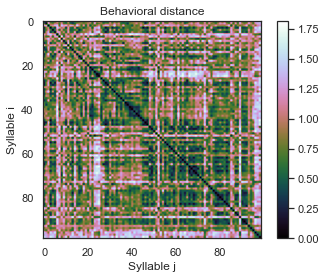

In [6]:
fig, ax = plt.subplots(1)

h =ax.imshow(dist['ar[init]'], aspect='equal', cmap='cubehelix')
ax.set_title('Behavioral distance')
ax.set_xlabel('Syllable j')
ax.set_ylabel('Syllable i')
plt.colorbar(h, ax=ax)
plt.show()

fig.set_size_inches(12,12)
#fig.savefig(file_path+'Dataset_20190723_behavDist.png')

## Loading in scalars and model labels as a dataframe

In [8]:
# packs data into a dataframe, including all scalars and model labels (note that -5 is a fill value, ignore for all downstream analysis)

df = scalars_to_dataframe(sorted_index, include_model=model_file)
uuid = df['uuid'].unique()[0] # uuid for the first session

In [9]:
df

,timestamp,centroid_x_px,centroid_y_px,velocity_2d_px,velocity_3d_px,width_px,length_px,area_px,centroid_x_mm,centroid_y_mm,...,angle,velocity_theta,SessionName,SubjectName,StartTime,group,uuid,model_label,model_label (sort=usage),model_label (sort=frames)
0,1998387576,212.378647,36.431034,0.000000,0.000000,22.593216,45.804768,792.0,-70.662796,-291.870422,...,2.002491,0.000000,session01,King,2019-07-13T13:48:14.3934983-04:00,Con,d0d53474-7d4c-424c-bead-89b0483a1022,-5,-5,-5
1,1998387610,211.958771,36.435844,0.419904,0.553043,22.720619,43.726246,776.0,-71.342957,-291.862427,...,1.999390,3.129838,session01,King,2019-07-13T13:48:14.3934983-04:00,Con,d0d53474-7d4c-424c-bead-89b0483a1022,-5,-5,-5
2,1998387643,211.785110,36.702099,0.317883,0.338353,20.935556,42.675392,702.0,-71.624268,-291.419800,...,2.001822,2.136945,session01,King,2019-07-13T13:48:14.3934983-04:00,Con,d0d53474-7d4c-424c-bead-89b0483a1022,-5,-5,-5
3,1998387676,211.952728,36.642788,0.177802,0.295842,21.149313,43.262562,725.0,-71.352745,-291.518402,...,1.985022,-0.348338,session01,King,2019-07-13T13:48:14.3934983-04:00,Con,d0d53474-7d4c-424c-bead-89b0483a1022,29,72,63
4,1998387710,211.874756,37.614334,0.974670,1.104526,20.096786,44.586239,717.0,-71.479057,-289.903259,...,2.010844,1.648842,session01,King,2019-07-13T13:48:14.3934983-04:00,Con,d0d53474-7d4c-424c-bead-89b0483a1022,29,72,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53880,844063969,114.580444,307.115540,5.411566,5.523920,18.485682,41.435829,634.0,-229.087372,158.122543,...,7.175240,-0.907549,session01,Esquiva,2019-04-12T12:48:52.6769934-04:00,Con,56e38721-672a-427e-9d67-354f08322732,96,33,28
53881,844064002,116.664291,303.291718,4.354771,4.400574,17.878128,40.551540,597.0,-225.711716,151.765732,...,7.296943,-1.082634,session01,Esquiva,2019-04-12T12:48:52.6769934-04:00,Con,56e38721-672a-427e-9d67-354f08322732,96,33,28
53882,844064035,117.616791,300.000610,3.426170,3.836423,17.205132,40.696514,565.0,-224.168747,146.294510,...,7.373818,-1.295920,session01,Esquiva,2019-04-12T12:48:52.6769934-04:00,Con,56e38721-672a-427e-9d67-354f08322732,96,33,28
53883,844064069,117.663177,298.177917,1.823283,1.886792,17.173721,39.558586,561.0,-224.093613,143.264420,...,7.410060,-1.546005,session01,Esquiva,2019-04-12T12:48:52.6769934-04:00,Con,56e38721-672a-427e-9d67-354f08322732,96,33,28


In [13]:
df_partial=df.head(900000)
#print(df_partial)
df_csv = df_partial.to_csv(file_path+'/df_partial_as_csv.csv')

In [ ]:
use_labels = df['model_label'][df['uuid']==uuid].values

In [ ]:
# retrieve the frames for session 1

fname = sorted_index['files'][uuid]['path'][0]
with h5py.File(fname, 'r') as f:
    frames = f['frames'].value

In [ ]:
fig, ax = plt.subplots(1)
h = ax.imshow(frames[-1], vmin=10, vmax=40, cmap='cubehelix')
plt.colorbar(h, ax=ax, label='Depth (mm)')

In [ ]:
# to create spines, simply average the data across the width of the mouse (approx. 10 pixels from the middle in either direction)

r_center = frames.shape[1] // 2
spines = frames[:, r_center-10:r_center+10, :].mean(axis=1).T

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].imshow(spines, aspect='auto', vmin=10, vmax=55, cmap='cubehelix')
ax[0].set_xlim(100, 300)
ax[0].set_xticks(())
ax[0].set_yticks([0, 80])
ax[0].set_ylabel('Spine Height')
ax[1].imshow(np.tile(use_labels, (100, 1)), aspect='auto', cmap='flag')
ax[1].set_xlim(100, 300)
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_ylabel('Syllable')
plt.show()

In [ ]:
# get the transition matrix for the data

sorted_labels = relabel_by_usage(model_results['labels'])[0]
tm = get_transition_matrix(sorted_labels, combine=True, normalize='bigram')

In [ ]:
fig, ax = plt.subplots(1)
h = ax.imshow(tm[:30,:30], cmap='magma')
plt.colorbar(h, ax=ax)
ax.set_title('Bigram transition probabilities')
plt.show()

fig.set_size_inches(12,12)
fig.savefig(file_path+'Dataset_20190723_bigram.png')